In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

# Lab 4: Putting it all together in a mini project

**This lab is an optional group lab.** You can choose to work alone of in a group of up to four students. You are in charge of how you want to work and who you want to work with. Maybe you really want to go through all the steps of the ML process yourself or maybe you want to practice your collaboration skills, it is up to you! Just remember to indicate who your group members are (if any) when you submit on Gradescope. If you choose to work in a group, you only need to use one of your GitHub repos.

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
rubric={mechanics}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Make at least three commits.</li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab and upload it to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells.</li>
    </ul>
  <li>Also upload a <code>.pdf</code> export of the notebook to facilitate grading of manual questions (preferably WebPDF, you can select two files when uploading to gradescope)</li>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  <li>The data you download for this lab <b>SHOULD NOT BE PUSHED TO YOUR REPOSITORY</b> (there is also a <code>.gitignore</code> in the repo to prevent this).</li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

_Points:_ 2

https://github.ubc.ca/MDS-2022-23/DSCI_573_lab4_waielonh

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. Since this mini-project is open-ended there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you instead do a bunch of sane things and you have clearly motivated your choices, but still get lower model performance than your friend, don't sweat it.


#### A final note
Finally, the style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "several hours" but not "many hours" is a good guideline for a high quality submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
rubric={reasoning}

In this mini project, you will pick one of the following problems: 

1. A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

2. A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)
    
</div>

_Points:_ 3

1. We will be choosing the Regression problem of predicting `reviews_per_month` from the New York City Airbnb listings dataset.

- A glimpse of the dataset is shown below. We can see that there is a mix of numerical, categorical as well as textual data.
- There seem to be some missing values in the dataset. We choose to remove these values completely from the data as a preliminary preprocessing. We decided it was okay to do so in this case as we still have enough data (~ 39000 observations) to not be much of an issue. If in the worst case the model is still performing poorly after all kinds of optimizations, we may think of making use of the discarded data to try and get some performance out of it.
- looks like the `host_name`, `host_id`, and `id` features might not be of much use as they could likely all be unique and they are not numerical. Albeit we wouldn't be know for sure without further investigation

3. thefollowing preliminary preprocess has been carried in the cells below:
- drop all `NaN` values from the data.


In [2]:
# import necessary packages and download dataset from the given link
# https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import helper_functions

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import RidgeCV
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

data_raw = pd.read_csv('data/AB_NYC_2019.csv', parse_dates=['last_review'])
data_raw.describe(include='all')

/tmp/ipykernel_16741/3019336508.py:28: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_raw.describe(include='all')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23 00:00:00,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-03-28 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-08 00:00:00,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [4]:
data_raw.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
data = data_raw.dropna().reset_index().drop(columns=['index'])

In [6]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 2. Data splitting <a name="2"></a>
rubric={reasoning}

**Your tasks:**

1. Split the data into train and test portions.

> Make the decision on the `test_size` based on the capacity of your laptop. 
    
</div>

_Points:_ 1

In [7]:
train_df, test_df = train_test_split(data, test_size=0.3, random_state=123)

# X_train, y_train = train_df.drop(columns=['reviews_per_month']), train_df['reviews_per_month']
# X_test, y_test = test_df.drop(columns=['reviews_per_month']), test_df['reviews_per_month']

# print("Shape of training data: ", train_df.shape)
# print("Shape of test data: ", test_df.shape)

We use an 70-30 train-test split, since we have a decent amount of data.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 3. EDA <a name="3"></a>
rubric={viz,reasoning}
    
Perform exploratory data analysis on the train set.

**Your tasks:**

1. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
2. Summarize your initial observations about the data. 
3. Pick appropriate metric/metrics for assessment. 
    
</div>

_Points:_ 6

## 1 Exploring numeric features
---

We plot the distributions of numeric features and some other plots we thought were interesting:

- The first dataframe below aims to perhaps get information regarding co-linearity and multi-colinearity between features and the target variable.
- Next, the distrubtions of the numerical data. We can get an understanding of what sorts of transformations may be applicable to different features.
- We also plot a 2d-histogram between latitude and longitude which shows areas of higher or lower `reviews_per_month` densities.
- After looking at the distribution, we see a lot of skewness. So we have plotted log transformations of those to check whether they can be more normal (works better for machine learning models)

In [8]:
numeric_features = (train_df
                    .select_dtypes(include='number')
                    .columns
                    .tolist()
                   )
numeric_features

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [9]:
train_df[numeric_features].corr('pearson').style.background_gradient()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.591011,-0.007955,0.103214,-0.011728,-0.073034,-0.329117,0.296995,0.095700,0.000031
host_id,0.591011,1.000000,0.010383,0.138363,0.002976,-0.051107,-0.140275,0.302014,0.148645,0.147326
latitude,-0.007955,0.010383,1.000000,0.090698,0.029390,0.026351,-0.010910,-0.010735,0.002332,-0.017927
longitude,0.103214,0.138363,0.090698,1.000000,-0.156566,-0.050557,0.053667,0.151511,-0.094229,0.105214
price,-0.011728,0.002976,0.029390,-0.156566,1.000000,0.028225,-0.036525,-0.037279,0.054206,0.079026
minimum_nights,-0.073034,-0.051107,0.026351,-0.050557,0.028225,1.000000,-0.064675,-0.115135,0.064402,0.095879
number_of_reviews,-0.329117,-0.140275,-0.010910,0.053667,-0.036525,-0.064675,1.000000,0.551890,-0.059204,0.192000
reviews_per_month,0.296995,0.302014,-0.010735,0.151511,-0.037279,-0.115135,0.551890,1.000000,-0.008598,0.178697
calculated_host_listings_count,0.095700,0.148645,0.002332,-0.094229,0.054206,0.064402,-0.059204,-0.008598,1.000000,0.183518
availability_365,0.000031,0.147326,-0.017927,0.105214,0.079026,0.095879,0.192000,0.178697,0.183518,1.000000


We see that the feature `number_of_reviews` is has high positive linearity with the target `reviews_per_month` meaning they have a strong linear relationship. This means Linear models may be useful for this prediction problem.

Let's take a look at the distributions of these features:

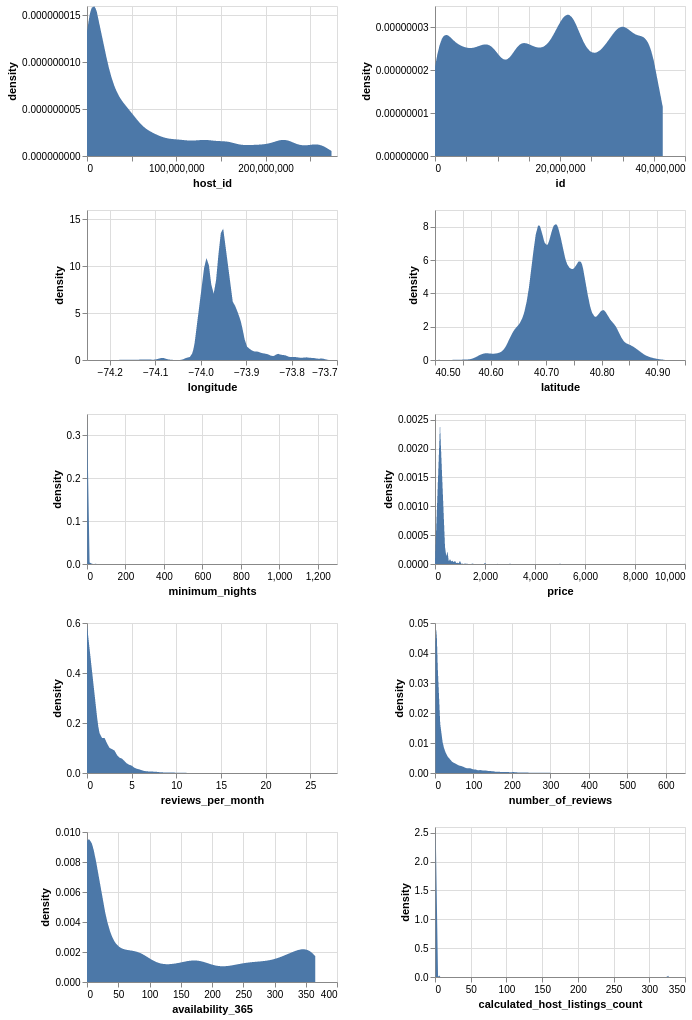

In [10]:
charts = []
even_chart = None
odd_chart = None

for count, column in enumerate(numeric_features):
    temp = alt.Chart(train_df).transform_density(
        column,
        as_=[column, 'density']
    ).mark_area().encode(
        alt.X(column, type='quantitative'),
        alt.Y('density:Q')
    ).properties(
        height=150,
        width=250
    )
    if count%2:
        if odd_chart != None:
            odd_chart = odd_chart & temp
        else:
            odd_chart = temp
    else:
        if even_chart != None:
            even_chart = even_chart & temp
        else:
            even_chart = temp

odd_chart | even_chart

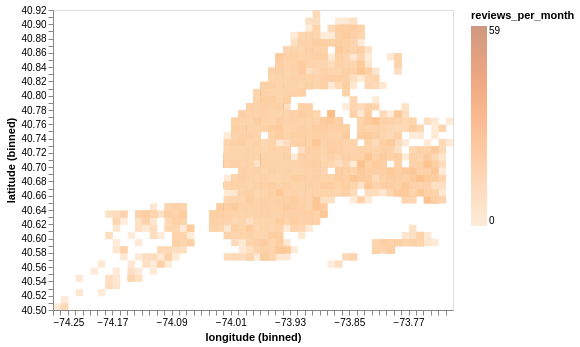

In [11]:
alt.Chart(data).mark_rect(opacity = 0.5).encode(
    alt.X('longitude', bin=alt.Bin(maxbins=60)),
    alt.Y('latitude', bin=alt.Bin(maxbins=60)),
    alt.Color('reviews_per_month',scale=alt.Scale(scheme = 'oranges')))

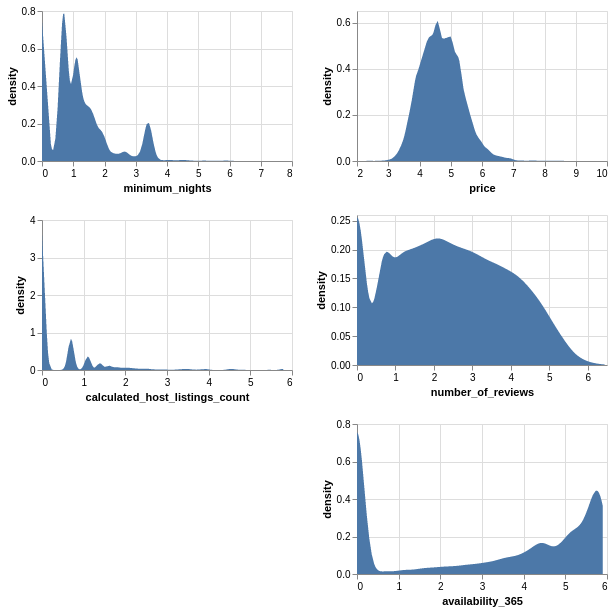

In [12]:
log_numerical_features = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
charts = []
even_chart = None
odd_chart = None

for count, column in enumerate(log_numerical_features):
    temp = alt.Chart(train_df[log_numerical_features].apply(np.log)).transform_density(
        column,
        as_=[column, 'density']
    ).mark_area().encode(
        alt.X(column, type='quantitative'),
        alt.Y('density:Q')
    ).properties(
        height=150,
        width=250
    )
    if count%2:
        if odd_chart != None:
            odd_chart = odd_chart & temp
        else:
            odd_chart = temp
    else:
        if even_chart != None:
            even_chart = even_chart & temp
        else:
            even_chart = temp

odd_chart | even_chart

## Exporing Categorical Features
---

Here, we look at bar charts of the different categories to see their distributions.

Taking a look at the unique counts of all non-numeric data, it seems like its not a good idea to look at all the different categories of the different variables since some of the features have thousands of various unique values. so we will look at each column selectively.

- For `neighbourhood_group` and `room_type`, we can do it traditionally by plotting a simple bar chart
- `last_review` is actually of type `date` and we can hence ignore it in this section
- `name` is all unique values and so we will not look at those at all as they do not seem important to the prediction problem
- `neighbourhood` can be grouped into different `neighbourhood_group` so we can use a faceted chart to see the distribution within each group
- `host_name` looks like it may be categorical but we do not want our model to potentially have a bias in it because of the name of a person and predict lower or higher based on names.

In [13]:
categorical_features = data.select_dtypes(exclude='number').columns.tolist()
categorical_train_df = train_df.loc[:, categorical_features]

unique_count = pd.DataFrame()
unique_count['columns'] = categorical_train_df.columns
unique_count['valid_count'] = categorical_train_df.count(axis=0).reset_index()[0]
unique_count['unique_count'] = categorical_train_df.nunique().reset_index()[0]
unique_count

,columns,valid_count,unique_count
0,name,27174,26859
1,host_name,27174,7947
2,neighbourhood_group,27174,5
3,neighbourhood,27174,215
4,room_type,27174,3
5,last_review,27174,1668


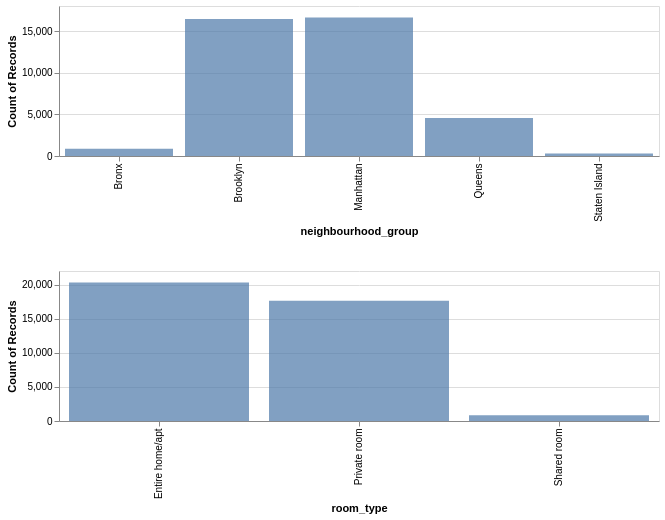

In [14]:
alt.Chart(data).mark_bar(opacity=0.7).encode(
    alt.X(alt.repeat(), type='ordinal'),
    alt.Y('count()', stack=False)).properties(height=150,width=600).repeat(
    ['neighbourhood_group', 'room_type'],
    columns=1
)

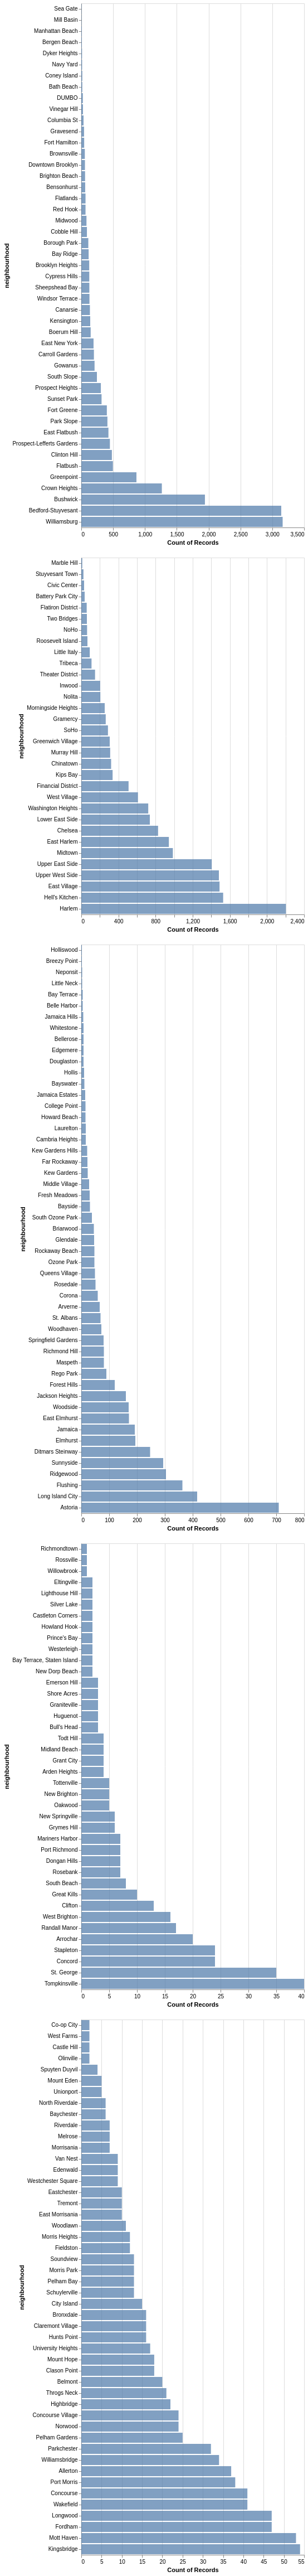

In [15]:
cat_charts = []

for column in data['neighbourhood_group'].unique():
    temp = alt.Chart(data[data['neighbourhood_group'] == column]).mark_bar(opacity=0.7).encode(
        alt.X('count()',stack = False),
        alt.Y('neighbourhood', type = 'ordinal', sort='x')
    )
    cat_charts.append(temp)

alt.vconcat(*cat_charts)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 4. Feature engineering (Challenging)
rubric={reasoning}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing.
    
</div>

_Points:_ 0.5

## Feature engineering
---

the `last_review` feature is a `date` type feature. We can extract the 'age' of the review as it could be quite a helpful feature for our model to learn.
We will have to do this both the train as well as test data since we happened to perform splitting before the Feature engineering section. We also take a quick look at the distribution of this new feature to see whether we require some kind of transformation to be applied to it.

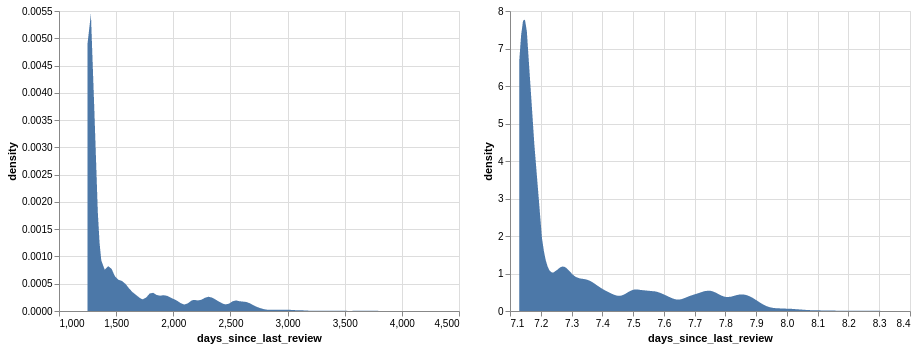

In [16]:
train_df['days_since_last_review'] = (pd.Timestamp.now().normalize() - train_df['last_review']).dt.days
test_df['days_since_last_review'] = (pd.Timestamp.now().normalize() - test_df['last_review']).dt.days

non_log_chart = alt.Chart(train_df).transform_density(
    'days_since_last_review',
    ['days_since_last_review', 'density']
).mark_area().encode(
    alt.X('days_since_last_review', type='quantitative'),
    alt.Y('density:Q')
)

temp = train_df.copy()
temp['days_since_last_review'] = train_df['days_since_last_review'].apply(np.log)
log_chart = alt.Chart(temp).transform_density(
    'days_since_last_review',
    ['days_since_last_review', 'density']
).mark_area().encode(
    alt.X('days_since_last_review', type='quantitative'),
    alt.Y('density:Q')
)

non_log_chart | log_chart

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 5. Preprocessing and transformations <a name="5"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 
    
</div>

_Points:_ 4

After performing EDA to take a good look at the features available to us for this problem, we have decided to make the following preprocessing on our features:

- numerical features: we perform scaling on the numeric features. we also perform log transformation on these feaures $-$ `days_since_last_review`, `price`, `minimum_nights`, `calculated_host_listings_count`, `number_of_reviews`, and `availability_365`
- categorical features: we perform one-hot encoding on these features $-$ `room_type`, `neighbourhood_group`
- drop features: the following features are being dropped from the data as they are either too varied (unique) or may make the model more complex. They may be used later in case the model is perform poorly $-$ `neighbourhood`, `host_id`, `id`, `name`, `host_name`, `last_review`

In [17]:
numerical_feats = ['latitude', 'latitude', 'minimum_nights', 'days_since_last_review', 'availability_365']
log_numerical_feats = ['price', 'number_of_reviews', 'calculated_host_listings_count']
categorical_feats = ['neighbourhood_group', 'room_type']
drop_feats = ['neighbourhood', 'host_id', 'id', 'name', 'host_name', 'last_review']

preprocessor = make_column_transformer(
    (StandardScaler(), numerical_feats + log_numerical_feats),
    (FunctionTransformer(helper_functions.log_transformer), log_numerical_feats),
    (OneHotEncoder(handle_unknown='ignore'), categorical_feats),
    ('drop', drop_feats)
)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['latitude', 'latitude', 'minimum_nights',
                                  'days_since_last_review', 'availability_365',
                                  'price', 'number_of_reviews',
                                  'calculated_host_listings_count']),
                                ('functiontransformer',
                                 FunctionTransformer(func=<function log_transformer at 0x7f3d1da477f0>),
                                 ['price', 'number_of_reviews',
                                  'calculated_host_listings_count']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['neighbourhood_group', 'room_type']),
                                ('drop', 'drop',
                                 ['neighbourhood', 'host_id', 'id', 'name',
                                  'host_name', 'last_review'])])

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 6. Baseline model <a name="6"></a>
rubric={accuracy}

**Your tasks:**
1. Train a baseline model for your task and report its performance.
    
</div>

_Points:_ 2

## Creating a baseline
---
We make use decision tree as well as a basic linear regression model as a baseline. This will give us a reference to test against when we use other more power models later on.
But before we do any of that, we need to seperate our features from the target variables.

1. The Decision Tree performs perfectly on training score however has the worst validation score
2. Linear Regression performs  almost as poorly itself in both train and validation scores 

In [18]:
X_train, y_train = train_df.drop(columns=['reviews_per_month']), train_df['reviews_per_month']
X_test, y_test = test_df.drop(columns=['reviews_per_month']), test_df['reviews_per_month']

In [19]:
cross_val_results = {}

pipe_linear = make_pipeline(
    preprocessor,
    LinearRegression()
)

pipe_decisiontree = make_pipeline(
    preprocessor,
    DecisionTreeRegressor()
)

cross_val_results["Base-Linear"] = pd.DataFrame(cross_validate(
    pipe_linear,
    X_train,
    y_train,
    cv=10,
    scoring="r2",
    return_train_score=True,
    error_score='raise'
)).agg(['mean','std']).round(3).T

cross_val_results["Base-Tree"] = pd.DataFrame(cross_validate(
    pipe_decisiontree,
    X_train,
    y_train,
    cv=10,
    scoring="r2",
    return_train_score=True,
    error_score='raise'
)).agg(['mean','std']).round(3).T

pd.concat(cross_val_results, axis=1)

Base-Linear        Base-Tree       
                   mean    std      mean    std
fit_time          0.109  0.019     0.827  0.378
score_time        0.019  0.008     0.026  0.009
test_score        0.428  0.015     0.305  0.044
train_score       0.428  0.002     1.000  0.000

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 7. Linear models <a name="7"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.
    
</div>

_Points:_ 8

We try a model `Ridge` which performs L2 regularization as well as Hyperparameter optimization on `alpha` . However, we don't expect this to do much as we aren't overfitting the data by any means.

As is evident from the data frame below. The linear model does not make any change in the scores. The model is still heavily under-fitting the data.

In [20]:
pipe_ridge = make_pipeline(
    preprocessor,
    RidgeCV()
)

cross_val_results["Ridge"] = pd.DataFrame(cross_validate(
    pipe_ridge,
    X_train,
    y_train,
    cv=10,
    scoring="r2",
    return_train_score=True,
    error_score='raise'
)).agg(['mean','std']).round(3).T

pd.concat(cross_val_results, axis=1)

Base-Linear        Base-Tree         Ridge       
                   mean    std      mean    std   mean    std
fit_time          0.109  0.019     0.827  0.378  0.104  0.014
score_time        0.019  0.008     0.026  0.009  0.014  0.003
test_score        0.428  0.015     0.305  0.044  0.428  0.015
train_score       0.428  0.002     1.000  0.000  0.428  0.002

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 8. Different models <a name="8"></a>
rubric={accuracy,reasoning}

**Your tasks:**
1. Try out three other models aside from the linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat the performance of the linear model? 
    
</div>

_Points:_ 10

We now test 3 different models to see which models have a better off-the-bat fit. We will then optimize those models further to improve the results even more.

- `CatBoost` is a optimized ensemble learning method which improves upon random forest. This regressor performs the best on the training as well as test data and thus looks very promising. It also seems that the model is overfitting a little bit.
- `SVR` didn't quite perform too well and neither did `KNN` which also had an overfitting scenario. These models may be improved a little with hyperparameter optimization.

In [25]:
# create pipeline for CatBoost regressor
pipe_cat = make_pipeline(
    preprocessor,
    CatBoostRegressor(verbose=False, random_state=123)
)

# create pipeline for SVC
pipe_svr = make_pipeline(
    preprocessor,
    SVR()
)

# create pipeline for KNN regressor
pipe_knn = make_pipeline(
    preprocessor,
    KNeighborsRegressor(n_jobs=-1)
)

# cross validation for CatBoost
cross_val_results["Cat Boost"] = pd.DataFrame(cross_validate(
    pipe_cat,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring="r2",
    return_train_score=True,
)).agg(['mean','std']).round(3).T

# cross validation for KNN
cross_val_results["KNN"] = pd.DataFrame(cross_validate(
    pipe_knn,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring="r2",
    return_train_score=True,
)).agg(['mean','std']).round(3).T

# cross validation for SVR
cross_val_results["SVR"] = pd.DataFrame(cross_validate(
    pipe_svr,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring="r2",
    return_train_score=True,
)).agg(['mean','std']).round(3).T

pd.concat(cross_val_results, axis=1)

Base-Linear        Base-Tree         Ridge        Cat Boost  \
                   mean    std      mean    std   mean    std      mean   
fit_time          0.109  0.019     0.827  0.378  0.104  0.014     6.629   
score_time        0.019  0.008     0.026  0.009  0.014  0.003     0.029   
test_score        0.428  0.015     0.305  0.044  0.428  0.015     0.663   
train_score       0.428  0.002     1.000  0.000  0.428  0.002     0.779   

                      KNN            SVR         
               std   mean    std    mean    std  
fit_time     0.744  0.031  0.003  52.389  5.739  
score_time   0.007  0.583  0.022   5.829  0.608  
test_score   0.021  0.476  0.022   0.481  0.020  
train_score  0.002  0.654  0.002   0.484  0.002

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 9. Feature selection (Challenging)
rubric={reasoning}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises unless you think there are other benefits with using less features.
    
</div>

_Points:_ 0.5

## Feature Selection
---
We try 3 different kinds of feature selection on the best performing model from the previous question. But feature selection does not work as intended and we don't see any improvements in the results. This makes sense as from our EDA as well as the performance of previous models, we know that our data is non-linear. the feature selection we carried out uses mostly linear estimators for selection and so wasn't able to contribute much. It is interesting to note that even the feature selection using `RandomForestRegressor` yielded no improvments in the cross validation results.

In [28]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

pipe_rfe = make_pipeline(
    preprocessor,
    RFECV(RandomForestRegressor()),
    CatBoostRegressor(verbose=0, random_state=123)
)
pipe_forward = make_pipeline(
    preprocessor,
    SequentialFeatureSelector(Ridge(), direction='forward'),
    CatBoostRegressor(verbose=0, random_state=123)
)
pipe_lasso = make_pipeline(
    preprocessor,
    SelectFromModel(Lasso(alpha=0.01)),
    CatBoostRegressor(verbose=0, random_state=123)
)

# cross validation for 
cross_val_results["Cat Boost Feat. RFR"] = pd.DataFrame(cross_validate(
    pipe_rfe,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring="r2",
    return_train_score=True,
)).agg(['mean','std']).round(3).T

# cross validation for 
cross_val_results["Cat Boost Feat. Ridge"] = pd.DataFrame(cross_validate(
    pipe_forward,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring="r2",
    return_train_score=True,
)).agg(['mean','std']).round(3).T

# cross validation for 
cross_val_results["Cat Boost Feat. Lasso"] = pd.DataFrame(cross_validate(
    pipe_lasso,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    scoring="r2",
    return_train_score=True,
)).agg(['mean','std']).round(3).T

pd.concat(cross_val_results, axis=1)

/home/waielonh/miniconda3/envs/573/lib/python3.10/site-packages/sklearn/feature_selection/_sequential.py:188: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(
/home/waielonh/miniconda3/envs/573/lib/python3.10/site-packages/sklearn/feature_selection/_sequential.py:188: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(
/home/waielonh/miniconda3/envs/573/lib/python3.10/site-packages/sklearn/feature_selection/_sequential.py:188: FutureWarning: Leaving `n_feat

Base-Linear        Base-Tree         Ridge        Cat Boost  \
                   mean    std      mean    std   mean    std      mean   
fit_time          0.109  0.019     0.827  0.378  0.104  0.014     6.629   
score_time        0.019  0.008     0.026  0.009  0.014  0.003     0.029   
test_score        0.428  0.015     0.305  0.044  0.428  0.015     0.663   
train_score       0.428  0.002     1.000  0.000  0.428  0.002     0.779   

                      KNN            SVR        Cat Boost Feat. RFR          \
               std   mean    std    mean    std                mean     std   
fit_time     0.744  0.031  0.003  52.389  5.739             817.454  40.182   
score_time   0.007  0.583  0.022   5.829  0.608               0.010   0.003   
test_score   0.021  0.476  0.022   0.481  0.020               0.663   0.021   
train_score  0.002  0.654  0.002   0.484  0.002               0.779   0.002   

            Cat Boost Feat. Ridge        Cat Boost Feat. Lasso         
                             mean    std                  mean    std  
fit_time                    6.037  0.272                 4.987  0.276  
score_time                  0.009  0.000                 0.009  0.000  
test_score                  0.642  0.025                 0.663  0.020  
train_score                 0.740  0.011                 0.778  0.002

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 10. Hyperparameter optimization
rubric={accuracy,reasoning}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

In [ ]:
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 11. Interpretation and feature importances <a name="1"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 
    
</div>

_Points:_ 8

_Type your answer here, replacing this text._

In [ ]:
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 12. Results on the test set <a name="12"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

In [ ]:
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 13. Summary of results <a name="13"></a>
rubric={reasoning}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook.
    
</div>

_Points:_ 8

_Type your answer here, replacing this text._

In [ ]:
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 14. Creating a data analysis pipeline (Challenging)
rubric={reasoning}

**Your tasks:**
- In 522 you learned how build a reproducible data analysis pipeline. Convert this notebook into scripts and create a reproducible data analysis pipeline with appropriate documentation. Submit your project folder in addition to this notebook on GitHub and briefly comment on your organization in the text box below.
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 15. Your takeaway from the course (Challenging)
rubric={reasoning}

**Your tasks:**

What is your biggest takeaway from this course? 
    
</div>

_Points:_ 0.25

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<div class="alert alert-danger" style="color:black">
    
**Restart, run all and export a PDF before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors
and so that the TAs can see your plots on Gradescope.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for MDS,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
    
After running all the cells,
export a PDF of the notebook (preferably the WebPDF export)
and upload this PDF together with the ipynb file to Gradescope
(you can select two files when uploading to Gradescope)
</div>

---

## Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans:

2. Do you have any feedback on the lab you be willing to share? For example, any part or question that you particularly liked or disliked?

#Ans: